## 퀴즈

### arange()를 활용하여 array([2, 5, 8, 11, 14, 17, 20])의 값을 갖는 ndarray를 만드세요.

In [5]:
import numpy as np

np.arange(2, 21, 3)

array([ 2,  5,  8, 11, 14, 17, 20])

### 다음 실행 결과와 같이 index가 '일', '이', '삼'이고 values가 1, 2, 3인 Series를 만들어보세요.

> 실행결과:  
일 1  
이  2  
삼   3  
dtype: int64

In [9]:
import pandas as pd

index = ('일', '이', '삼')
values = (1, 2, 3)

pd.Series(values, index)

일    1
이    2
삼    3
dtype: int64

## DataFrame 그룹 연산 메서드

In [12]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [13]:
groups = df2.groupby(df2.key1)
groups

In [14]:
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

In [15]:
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [16]:
df2.data1.groupby(df2.key1).sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [17]:
df2.groupby(df2.key1)['data1'].sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [18]:
df2.groupby(df2.key1).sum()['data1']

key1
A    8
B    7
Name: data1, dtype: int64

In [19]:
df2.data1.groupby([df2.key1, df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [22]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [23]:
df1['인구'].groupby([df1['지역'], df1['연도']]).sum().unstack('연도')

연도,2005,2010,2015
지역,,,
경상권,3512547,3393191,3448737
수도권,9762546,9894685,12794763


## Pandas 연습 문제

타이타닉호 데이터셋을 불러옵니다. 그리고 alive라는 column의 값이 'no'면 False로  
'yes'면 True로 변경해봅시다.

- change_boolean(value) 함수를 만듭니다. 이 함수는 value 값이 'yes'면 True를 반환하고 'no'이면 False를 반환합니다.
- 만든 함수를 활용해서 타이타닉호 데이터셋 중 alive라는 column의 값을 'no'면 False로 'yes'면 True로 치환해서 boolean 타입으로 변경해보세요.

In [69]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
def change_boolean(value):
    if value == 'yes':
        return True
    else:
        return False
    
titanic.alive = titanic.alive.apply(change_boolean)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,True,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,True,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,False,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True,True


In [73]:
titanic.alive.unique()

array([False,  True])

# Matplotlib

## Matplotlib이란

## matplotlib 및 matplotlib.pyplot 임포트하기

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## 만약 그래프가 출력되지 않는다면

In [79]:
%matplotlib inline

## matplotlib.pyplot.plot()

## 라인 플롯(line plot) - x 축의 위치

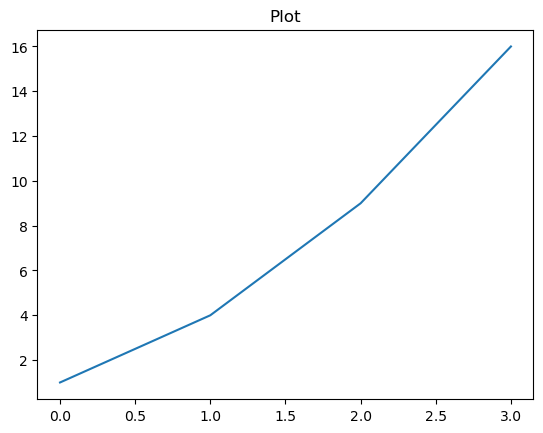

In [80]:
plt.title("Plot")
plt.plot([1, 4, 9, 16])
plt.show()

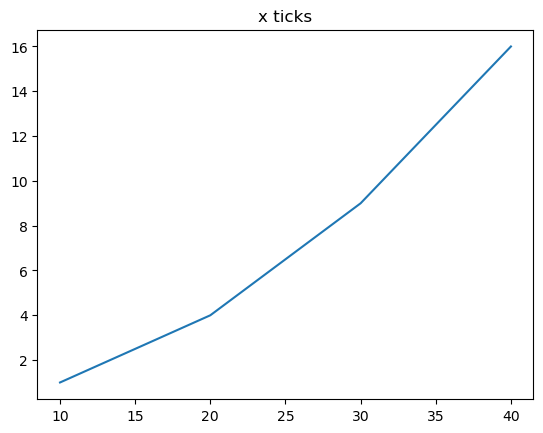

In [81]:
plt.title("x ticks")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show()

## 라인 플롯(line plot) - title()

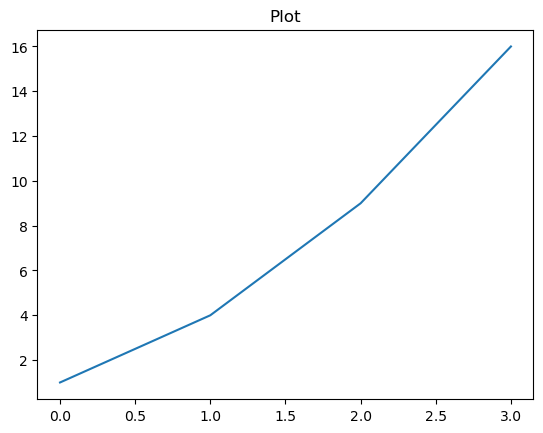

In [82]:
plt.title("Plot")
plt.plot([1, 4, 9, 16])
plt.show()

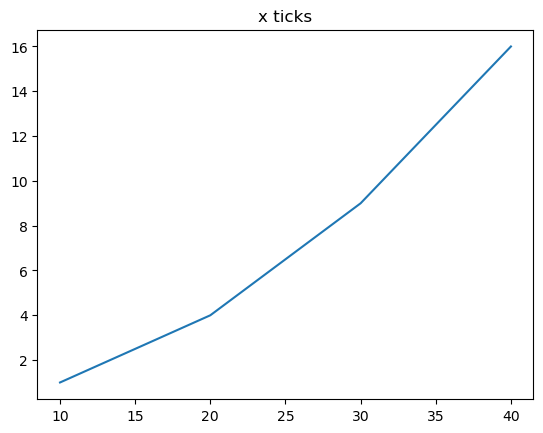

In [83]:
plt.title("x ticks")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show()

## 라인 플롯(line plot)

## 한글 폰트 사용하기

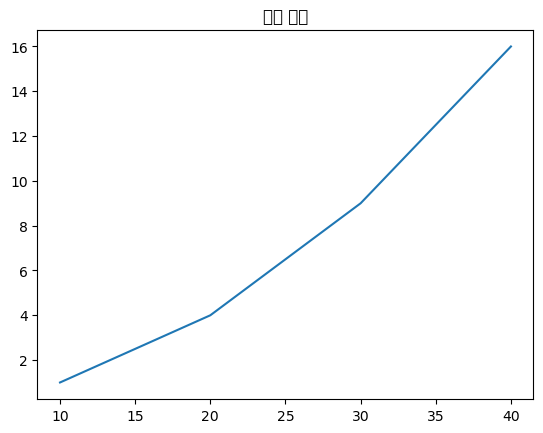

In [9]:
plt.title("한글 제목")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show()

### 리눅스

In [10]:
!sudo apt instasll -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## 한글 폰트 사용하기 - font_manager

In [100]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'H' in font]

['Franklin Gothic Heavy',
 'Century Gothic',
 'Chiller',
 'HYPMokGak-Bold',
 'HyhwpEQ',
 'Franklin Gothic Heavy',
 'Elephant',
 'HCR Batang Ext',
 'HCR Batang',
 'HYHeadLine-Medium',
 'Bernard MT Condensed',
 'Poor Richard',
 'Parchment',
 'Chiller',
 'High Tower Text',
 'HYPost-Light',
 'HYGothic-Medium',
 'Century Schoolbook',
 'HYPost-Medium',
 'Pyunji R',
 'HCR Batang',
 'Magic R',
 'HyhwpEQ',
 'HYGothic-Extra',
 'Century Gothic',
 'Bauhaus 93',
 'Showcard Gothic',
 'Harlow Solid Italic',
 'Harrington',
 'Century Gothic',
 'Century Gothic',
 'HCR Batang ExtB',
 'HCR Dotum',
 'Yet R',
 'HCR Dotum',
 'HYShortSamul-Medium',
 'HYGungSo-Bold',
 'Franklin Gothic Heavy',
 'HCR Batang',
 'Century Gothic',
 'Lucida Handwriting',
 'MoeumT R',
 'High Tower Text',
 'Century Schoolbook',
 'HYGothic-Extra',
 'Han Santteut Dotum',
 'HancomEQN',
 'Century Gothic',
 'Bradley Hand ITC',
 'Century Gothic',
 'HYSinMyeongJo-Medium',
 'HYMyeongJo-Extra',
 'Han Santteut Dotum',
 'HCR Batang Ext',
 'Hanco

In [51]:
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

['C:\\WINDOWS\\Fonts\\GILB____.TTF',
 'C:\\Windows\\Fonts\\SNAP____.TTF',
 'C:\\Windows\\Fonts\\PERB____.TTF',
 'C:\\Windows\\Fonts\\KUNSTLER.TTF',
 'C:\\WINDOWS\\Fonts\\TCM_____.TTF',
 'C:\\Windows\\Fonts\\PERBI___.TTF',
 'C:\\WINDOWS\\Fonts\\ANTQUAI.TTF',
 'C:\\WINDOWS\\Fonts\\VIVALDII.TTF',
 'C:\\WINDOWS\\Fonts\\msgothic.ttc',
 'C:\\Windows\\Fonts\\segoeuiz.ttf',
 'C:\\Windows\\Fonts\\ANTQUAI.TTF',
 'C:\\WINDOWS\\Fonts\\Gabriola.ttf',
 'C:\\Windows\\Fonts\\BOD_I.TTF',
 'C:\\Windows\\Fonts\\mvboli.ttf',
 'C:\\Windows\\Fonts\\YuGothM.ttc',
 'C:\\Windows\\Fonts\\FRAHVIT.TTF',
 'C:\\Windows\\Fonts\\CALISTI.TTF',
 'C:\\Windows\\Fonts\\MISTRAL.TTF',
 'C:\\Windows\\Fonts\\corbelb.ttf',
 'C:\\WINDOWS\\Fonts\\REFSAN.TTF',
 'C:\\WINDOWS\\Fonts\\PALSCRI.TTF',
 'C:\\Windows\\Fonts\\MATURASC.TTF',
 'C:\\WINDOWS\\Fonts\\mmrtext.ttf',
 'C:\\Windows\\Fonts\\VIVALDII.TTF',
 'C:\\Windows\\Fonts\\ROCKEB.TTF',
 'C:\\WINDOWS\\Fonts\\BRLNSB.TTF',
 'C:\\Windows\\Fonts\\segoeuisl.ttf',
 'C:\\WINDOWS\\Fonts

## 한글 폰트 사용하기 - Font scope

In [88]:
mpl.rcParams["font.family"] = 'Hancom Gothic'
# mpl.rc('font', family = 'NanumGothic')

In [89]:
mpl.rcParams['axes.unicode_minus'] = False

In [90]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path

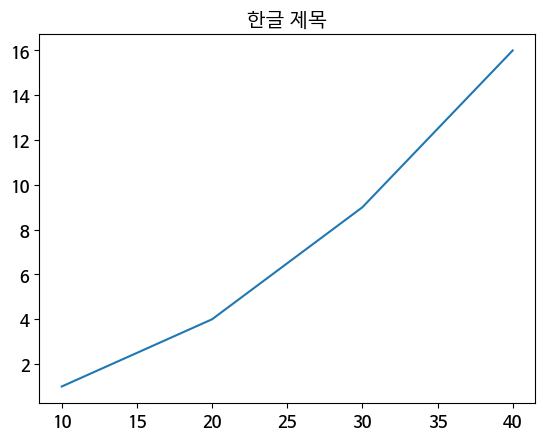

In [91]:
plt.title("한글 제목")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show()

## 한글 폰트 사용하기 - matplotlib.pyplot.rc()

In [92]:
global_font = {'family': 'Hancom Gothic', 'size': 12, 'weight': 'bold'}

# 폰트 설정
mpl.rc('font', **global_font) # pass in the font dict as kwargs
# mpl.rc('font', 'family': 'NanumGothic', 'size': 24, 'weight': 'bold')와 같이 동작합니다.

## 한글 폰트 사용하기 - 기본 폰트 확인

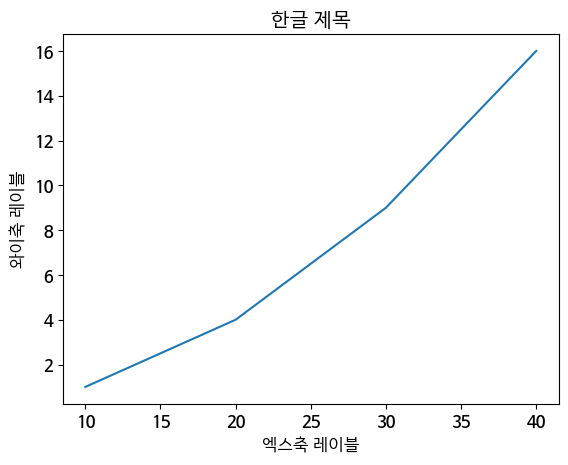

In [93]:
plt.title('한글 제목')
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.xlabel("엑스축 레이블")
plt.ylabel("와이축 레이블")
plt.show()

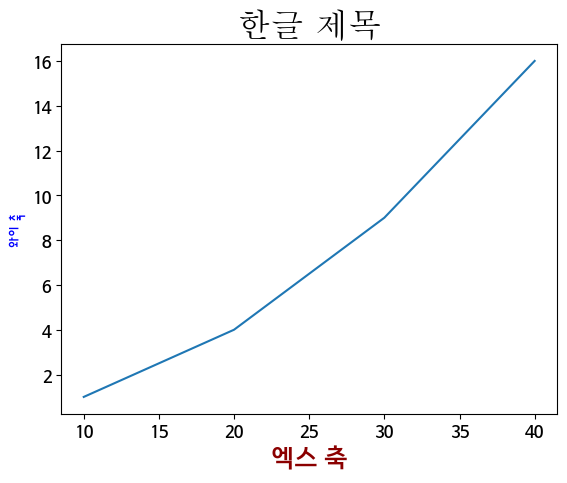

In [101]:
title_font = {'family' : 'Batang',
              'size' : 24,
              'color' : 'black'}
xlabel_font = {'family' : 'Hancom Gothic',
              'size' : 18,
              'weight' : 'bold',
              'color' : 'darkred'}
ylabel_font = {'family' : 'HYShortSamul-Medium',
              'size' : 12,
              'weight' : 'light',
              'color' : 'blue'}
plt.plot([10,20,30,40], [1,4,9,16])
plt.title('한글 제목', fontdict=title_font)
plt.xlabel('엑스 축', fontdict=xlabel_font)
plt.ylabel('와이 축', fontdict=ylabel_font)
plt.show()

## Unicode minus 표기법 설정

In [104]:
# 유니코드에서 음수 부호설정
mpl.rc('axes', unicode_minus=False)

## Style 설정하기

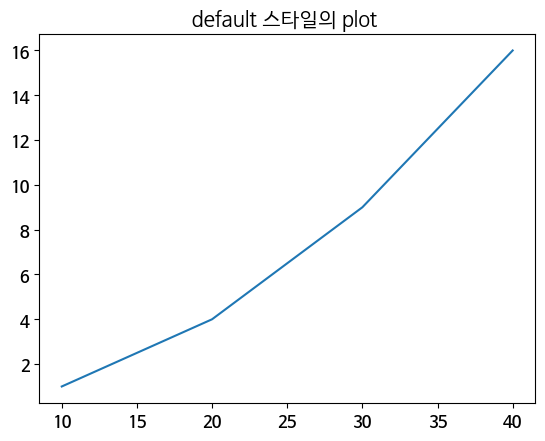

In [105]:
plt.title("default 스타일의 plot ")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show()

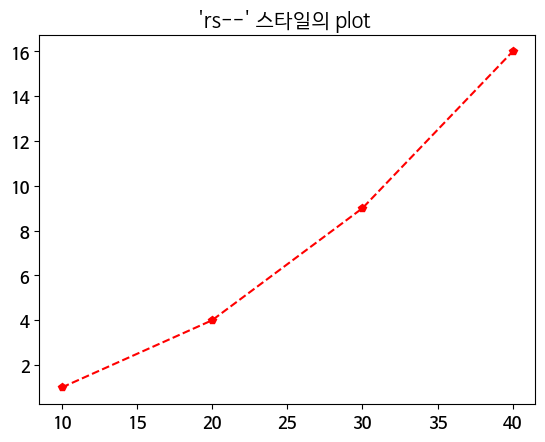

In [106]:
plt.title("'rs--' 스타일의 plot ")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], 'rp--')
plt.show()

## Style 설정하기 - style 설정하는 순서

## Style 설정하기 - color

https://matplotlib.org/2.0.2/examples/color/named_colors.html

## Style 설정하기 - marker

https://matplotlib.org/2.0.2/api/markers_api.html?highlight=marker#module-matplotlib.markers

## Style 설정하기 - linestyle

https://matplotlib.org/2.0.2/api/lines_api.html?highlight=line%20style#matplotlib.lines.Line2D.set_linestyle

## Style 설정하기 - 기타 style

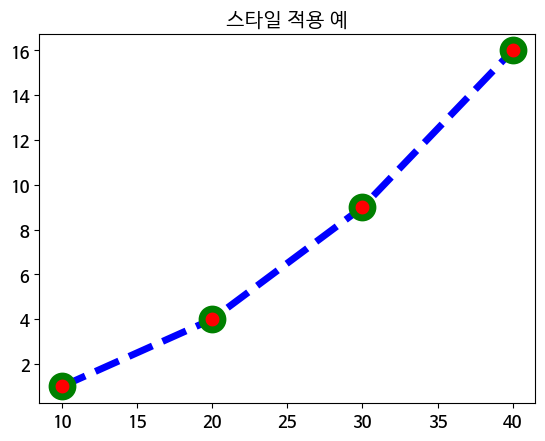

In [110]:
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b",
         lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.title("스타일 적용 예")
plt.show()

## 축의 범위 설정하기

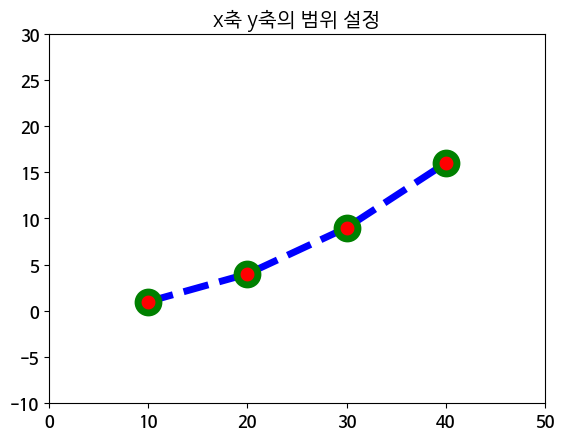

In [111]:
plt.title("x축 y축의 범위 설정")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b",
         lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.xlim(0, 50)
plt.ylim(-10, 30)
plt.show()

## 틱 설정하기

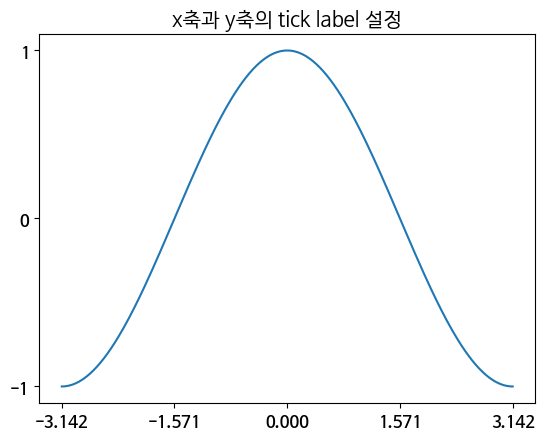

In [116]:
import numpy as np
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("x축과 y축의 tick label 설정")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1, 0, +1])
plt.show()

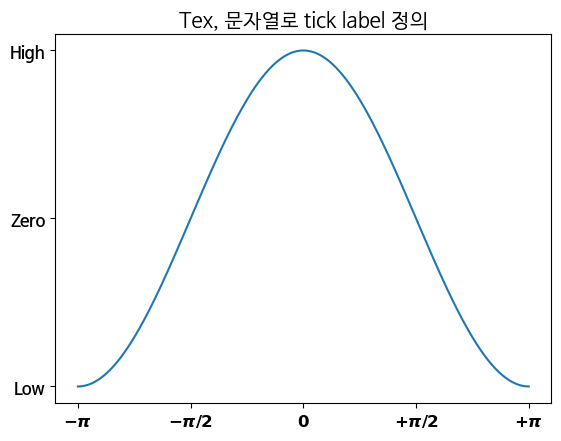

In [118]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("Tex, 문자열로 tick label 정의")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1], ["Low", "Zero", "High"])
plt.show()

## 여러 개의 선 그리기

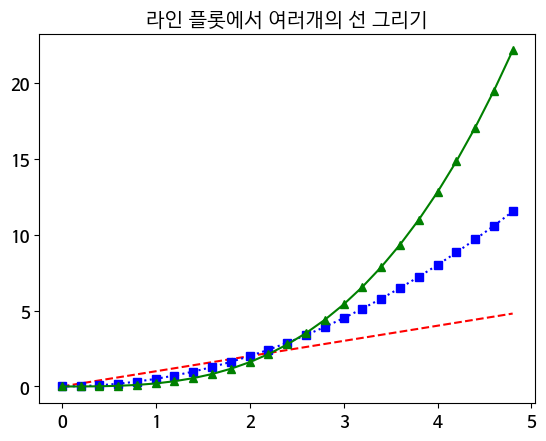

In [119]:
t = np.arange(0., 5., 0.2)
plt.title("라인 플롯에서 여러개의 선 그리기")
plt.plot(t, t, 'r--', t, 0.5 * t **2, 'bs:', t, 0.2 * t **3, 'g^-')
plt.show()

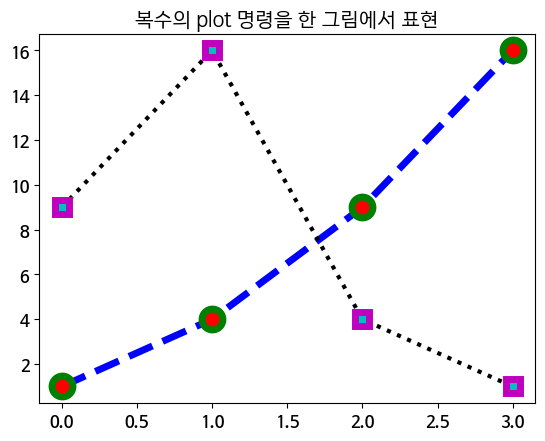

In [121]:
plt.title("복수의 plot 명령을 한 그림에서 표현")
style1 = {"c":"b", "lw":5, "ls":"--", "marker":"o", "ms":15, "mec":"g", "mew":5, "mfc":"r"}
style2 = {"c":"k", "lw":3, "ls":":", "marker":"s", "ms":10, "mec":"m", "mew":5, "mfc":"c"}

plt.plot([1, 4, 9, 16], **style1)
plt.plot([9, 16, 4, 1], **style2)

plt.show()

## 범례(Legend)

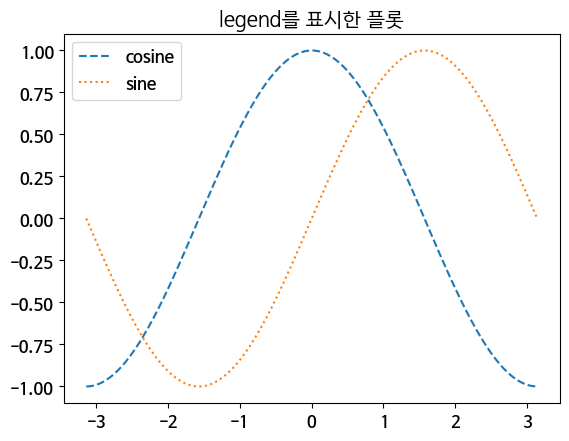

In [122]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.title("legend를 표시한 플롯")
plt.plot(X, C, ls="--", label="cosine")
plt.plot(X, S, ls=":", label="sine")
plt.legend(loc=2) # upper left
plt.show()

## x, y축 label

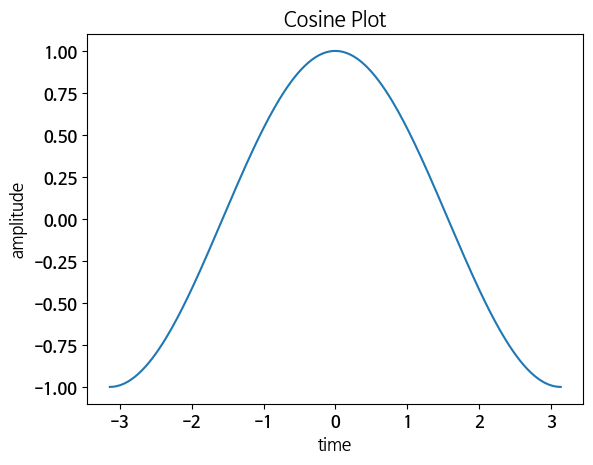

In [123]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, label="cosine")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Cosine Plot")
plt.show()

### 연습문제

다음과 같은 그래프를 그려보세요.

- title: 섭씨 온도와 화씨 온도
- xlabel: 화씨 온도
- ylabel: 섭씨 온도
- x 값은 화씨로 32이상~100미만의 정수, y값은 섭씨로 ℃ = (℉ - 32) x 5/9 를 통해 구합니다.

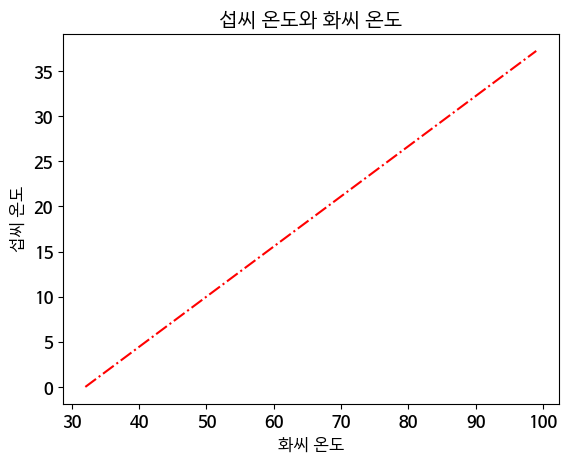

In [139]:
plt.title("섭씨 온도와 화씨 온도")
plt.xlabel("화씨 온도")
plt.ylabel("섭씨 온도")
F = np.arange(32, 100)
C = (F - 32) * 5/9
plt.plot(F, C, 'r-.')
plt.show()

## Figure

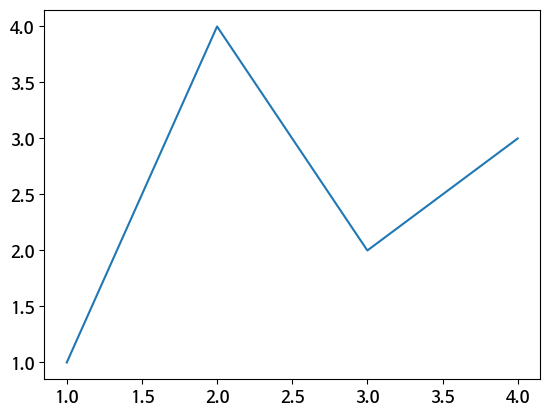

In [140]:
fig, ax = plt.subplots() # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]); # Plot some data on the axes.

<Figure size 640x480 with 0 Axes>

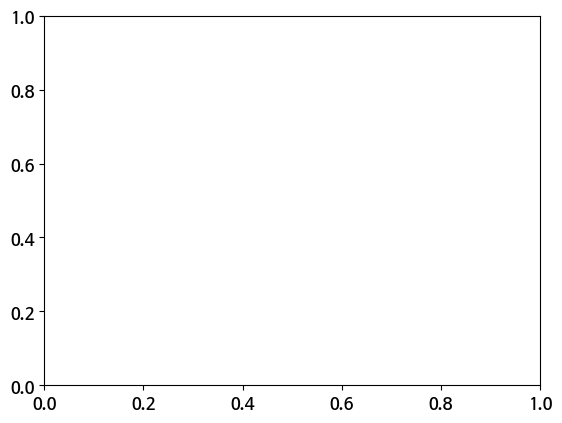

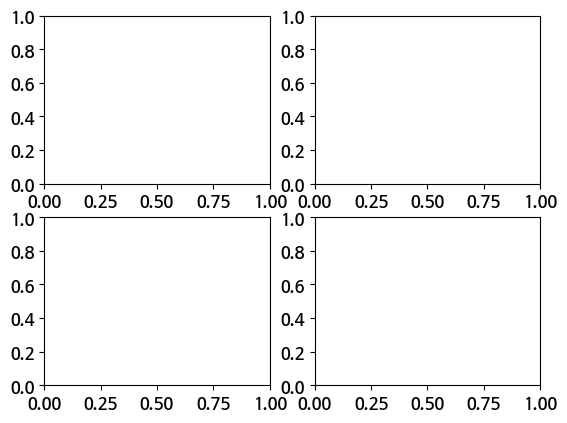

In [141]:
fig = plt.figure() # an empty figure with no Axes
fig, ax = plt.subplots() # a figure with a single Axes
fig, axs = plt.subplots(2, 2) # a figure with a 2x2 grid of Axes

## Figure - plt.plot()

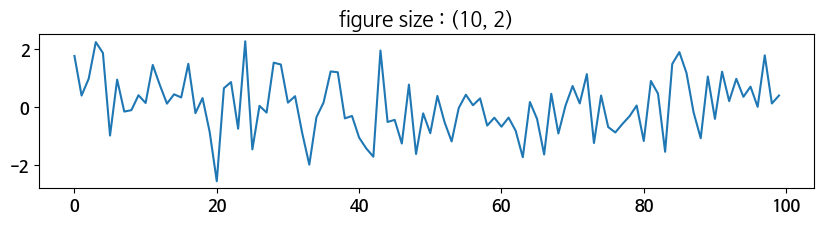

In [143]:
np.random.seed(0)
f1 = plt.figure(figsize=(10, 2))
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100))
plt.show()

## Figure - plt.show()가 그래프를 그리는 방식의 차이

## Figure - Figure 객체 얻기 plt.gcf()

Figure(640x480) 2434977485344
Figure(640x480) 2434977485344


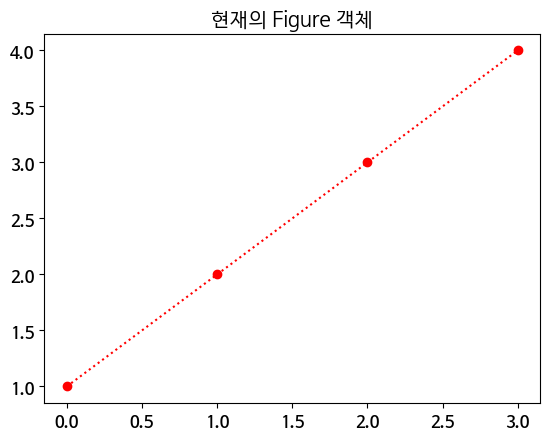

In [144]:
f1 = plt.figure(1)
plt.title("현재의 Figure 객체")
plt.plot([1, 2, 3, 4], 'ro:')

f2 = plt.gcf()
print(f1, id(f1))
print(f2, id(f2))
plt.show()

## Axes

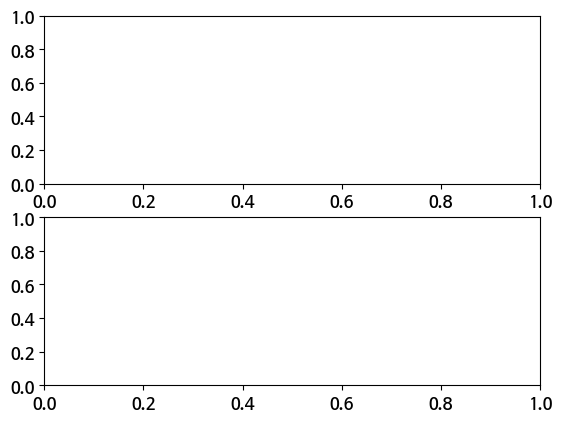

In [145]:
ax1 = plt.subplot(2, 1, 1)
# 여기에서 윗부분에 그릴 플롯 명령 실행

ax2 = plt.subplot(2, 1, 2)
# 여기에서 아랫부분에 그릴 플롯 명령 실행